# TC.L.ITF.1.2.1.3 Analog Integration  

# Version: 09Aug2023 

* Integrate LNAs, 8m cables, PASD, including Smart boxes, their FEMs, fiber cable assemblies, preADU cards, and test end-to-end analog receiver chain

    (1) Gain of the assembly, 
    
    (2) Provide noise from SSG corresponding to total power from antenna at Galactic Centre transit 
    and test change in response of assembled system when noise source is switched ON/OFF


In [ ]:
# pragma pylint: disable=line-too-long
# pragma pylint: disable=unnecessary-lambda
# pragma pylint: disable=unnecessary-lambda-assignment

In [5]:
import csv

import matplotlib.pyplot as plt
import numpy as np
import scipy.constants

PI = np.pi
KB = scipy.constants.k

# Define path where .csv files are stored
PATH = "/Users/sub005/Desktop/SKA_LOW/AIV/ITF Tests/Analog_Integration_TC_09Aug2023/"

In [6]:
# Return coefficients of a polynomial fit to data

func_poly = lambda p, x: (np.polyval(p, x))

In [7]:
# Define function to return numpy arrays of frequency and power from csv recordings of SA
# frequency in MHz; power in dBm/MHz


def get_frequency_spectrum(INFILE):
    sflag = 0
    freq = []
    Pdb0 = []
    with open(INFILE) as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            if row != []:
                if sflag == 1 and row[0] != "END":
                    freq.append(float(row[0]) / 1e6)
                    Pdb0.append(float(row[1]))
                if row[0] == "BEGIN":
                    sflag = 1

    freq = np.array(freq, dtype=np.float32)
    Pdb0 = np.array(Pdb0, dtype=np.float32)

    return (freq, Pdb0)

## Computations of the predicted outputs

* Input power level at LNA inputs are set to be, mid-band at 200 MHz: 
    - 1490 K antenna temperature === 2.06x10^-14 W/MHz
    - plus 273.15 + 21 = 294.15 K from the attenuations at input to LNAs,
    - plus about 40-70 K receiver noise
    - ------ giving system temperature equivalent noise power of -105.96 dBm/MHz 


* When off, the system temperature is 294.15 + 40-70 K receiver noise
    - ------ giving system temperature equivalent noise power of -113.18 dBm/MHz


* The total system gain of the analog chain is expected to be 
    - 40-45 dB gain typically for the multi-stage LNA, minus
    - 1.2-2.6 dB loss in the RF cable (2 dB mid band), plus
    - at least 41 dB for receiver (FEM+PreADU)
    - ------ to give at least 79-84 dB gain in all, mid band.


* The analog receiver ideally provides nominal power at ADU input of -2.7 dBm
    - Corresponding to a nominal power spectral density of -28.14 dBm/MHz over the 50-350 MHz band

* With -113.18 +/- 0.2 dBm/MHz dBm/MHz input (noise off case) and at least 79-84 dB gain, 
    - the output is expected to exceed -34.4 dBm/MHz

* With -105.96 +/- 0.9 dBm/MHz dBm/MHz input (noise on case) and at least 79-84 dB gain, 
    - the output is expected to exceed -27.9 dBm/MHz
    - ------ giving a step up by about 7 +/- 1 dB.


* System temperature step from 348 K to 1838 K gives a nominal step at input of 7 dB
    - This is the expected step at the output when noise source is switched on/off


* Given that there is structure in input noise from the sky signal generator, 
    - uncertainty in LNA Noise Figure as embedded in the adaptor and terminated with 50 ohms loads,
    - the analog integration is deemed successful if, with noise source off, 
    - the output power exceeds about -34 dBm/MHz over the Low band,
    - and the step increase on switching on the noise source raises the band by about 6 dB.


* Performance of the system under test, in detail, requires characterisation, in detail, of the test environment.
    - This is the focus of verification tests that follow.

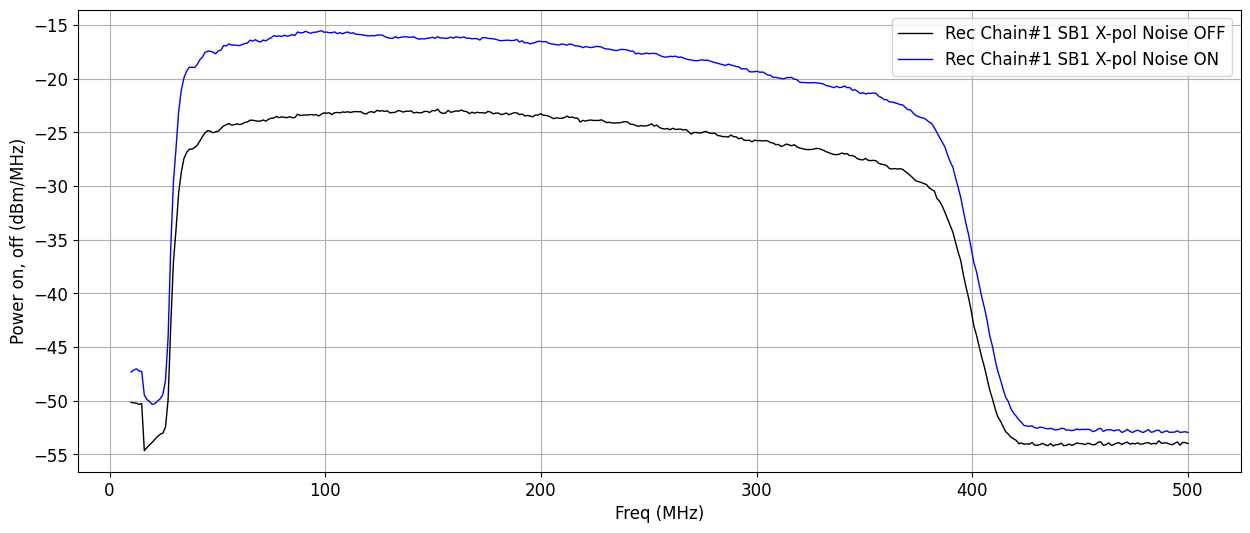

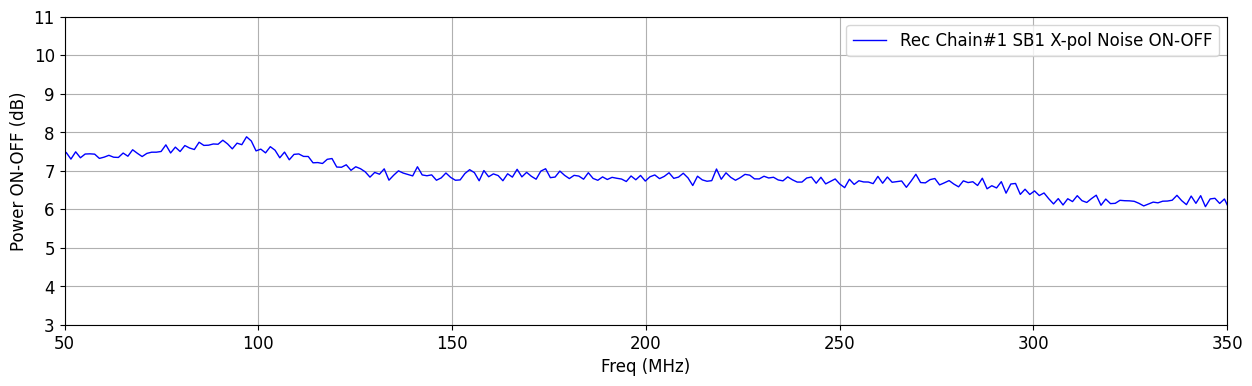

In [13]:
# Step 1
# Plot receiver chain #1 with Noise source off


plt.figure(figsize=[15, 6])
plt.rcParams.update({"font.size": 12})
ax1 = plt.subplot(1, 1, 1)

INFILE = "TC3v2_SB11x_ch1_noise_off.csv"
freq, Pdbmoff = get_frequency_spectrum(PATH + INFILE)
ax1.plot((freq), Pdbmoff, "k-", linewidth=1, label="Rec Chain#1 SB1 X-pol Noise OFF")
INFILE = "TC3v2_SB11x_ch1_noise_on.csv"
freq, Pdbmon = get_frequency_spectrum(PATH + INFILE)
ax1.plot((freq), Pdbmon, "b-", linewidth=1, label="Rec Chain#1 SB1 X-pol Noise ON")

plt.ylabel("Power on, off (dBm/MHz)")
plt.xlabel("Freq (MHz)")
# plt.xlim([50.0,350.0])
# plt.ylim([-35,-15])
plt.legend(loc="best")
plt.grid()
plt.show()

plt.figure(figsize=[15, 4])
plt.rcParams.update({"font.size": 12})
ax1 = plt.subplot(1, 1, 1)

ax1.plot(
    (freq),
    Pdbmon - Pdbmoff,
    "b-",
    linewidth=1,
    label="Rec Chain#1 SB1 X-pol Noise ON-OFF",
)

plt.ylabel("Power ON-OFF (dB)")
plt.xlabel("Freq (MHz)")
plt.xlim([50.0, 350.0])
plt.ylim([3, 11])
plt.legend(loc="best")
plt.grid()
plt.show()

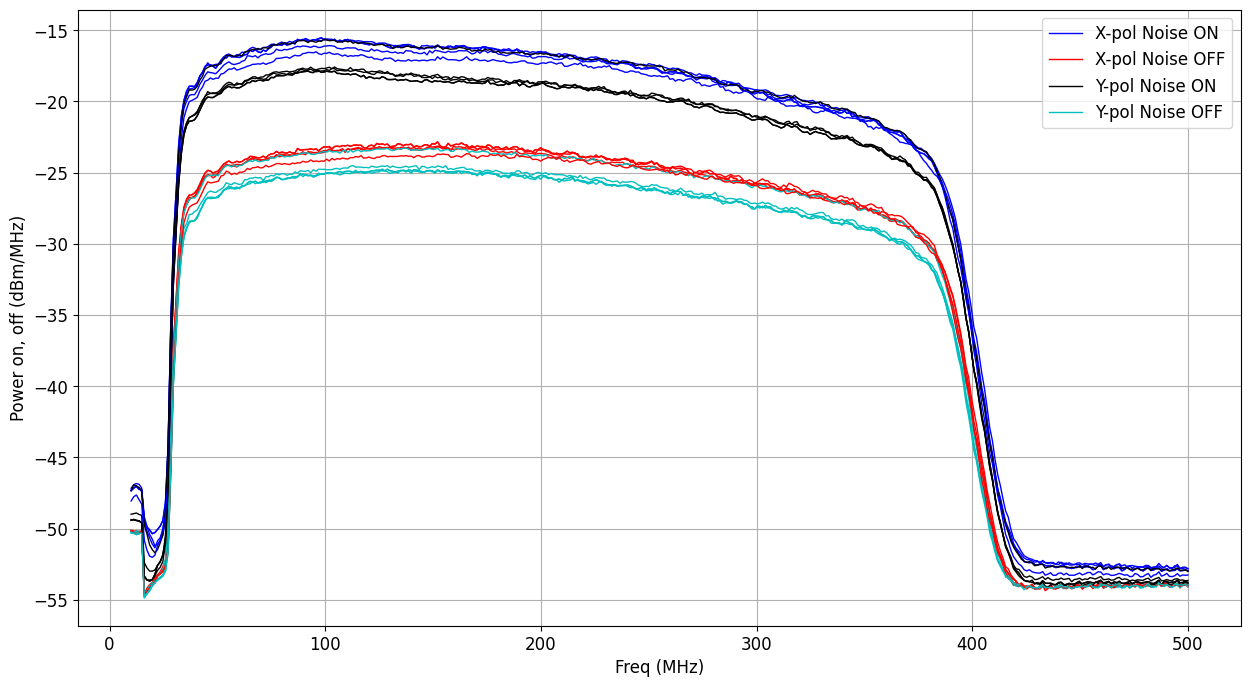

In [14]:
plt.figure(figsize=[15, 8])
plt.rcParams.update({"font.size": 12})
ax1 = plt.subplot(1, 1, 1)

ich = 0
for i, j in [[1, 1], [1, 2], [2, 1], [2, 2]]:
    ich += 1
    INFILE = "TC3v2_SB" + str(i) + str(j) + "x_ch" + str(ich) + "_noise_on.csv"
    freq, Pdbm = get_frequency_spectrum(PATH + INFILE)
    if i == 1 and j == 1:
        ax1.plot((freq), Pdbm, "b-", linewidth=1, label="X-pol Noise ON")
    ax1.plot((freq), Pdbm, "b-", linewidth=1)
    INFILE = "TC3v2_SB" + str(i) + str(j) + "x_ch" + str(ich) + "_noise_off.csv"
    freq, Pdbm = get_frequency_spectrum(PATH + INFILE)
    if i == 1 and j == 1:
        ax1.plot((freq), Pdbm, "r-", linewidth=1, label="X-pol Noise OFF")
    ax1.plot((freq), Pdbm, "r-", linewidth=1)

    ich += 1
    INFILE = "TC3v2_SB" + str(i) + str(j) + "y_ch" + str(ich) + "_noise_on.csv"
    freq, Pdbm = get_frequency_spectrum(PATH + INFILE)
    if i == 1 and j == 1:
        ax1.plot((freq), Pdbm, "k-", linewidth=1, label="Y-pol Noise ON")
    ax1.plot((freq), Pdbm, "k-", linewidth=1)
    INFILE = "TC3v2_SB" + str(i) + str(j) + "y_ch" + str(ich) + "_noise_off.csv"
    freq, Pdbm = get_frequency_spectrum(PATH + INFILE)
    if i == 1 and j == 1:
        ax1.plot((freq), Pdbm, "c-", linewidth=1, label="Y-pol Noise OFF")
    ax1.plot((freq), Pdbm, "c-", linewidth=1)

plt.ylabel("Power on, off (dBm/MHz)")
plt.xlabel("Freq (MHz)")
# plt.xlim([50.0,350.0])
# plt.ylim([-35,-15])
plt.legend(loc="best")
plt.grid()
plt.show()

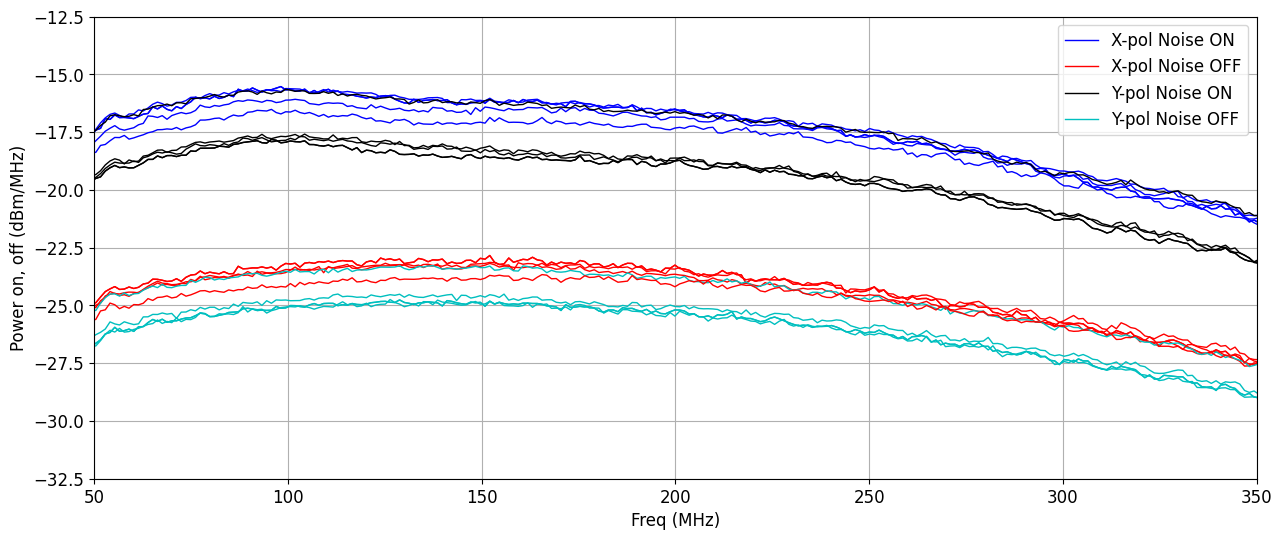

In [16]:
plt.figure(figsize=[15, 6])
plt.rcParams.update({"font.size": 12})
ax1 = plt.subplot(1, 1, 1)

ich = 0
for i, j in [[1, 1], [1, 2], [2, 1], [2, 2]]:
    ich += 1
    INFILE = "TC3v2_SB" + str(i) + str(j) + "x_ch" + str(ich) + "_noise_on.csv"
    freq, Pdbm = get_frequency_spectrum(PATH + INFILE)
    if i == 1 and j == 1:
        ax1.plot((freq), Pdbm, "b-", linewidth=1, label="X-pol Noise ON")
    ax1.plot((freq), Pdbm, "b-", linewidth=1)
    INFILE = "TC3v2_SB" + str(i) + str(j) + "x_ch" + str(ich) + "_noise_off.csv"
    freq, Pdbm = get_frequency_spectrum(PATH + INFILE)
    if i == 1 and j == 1:
        ax1.plot((freq), Pdbm, "r-", linewidth=1, label="X-pol Noise OFF")
    ax1.plot((freq), Pdbm, "r-", linewidth=1)

    ich += 1
    INFILE = "TC3v2_SB" + str(i) + str(j) + "y_ch" + str(ich) + "_noise_on.csv"
    freq, Pdbm = get_frequency_spectrum(PATH + INFILE)
    if i == 1 and j == 1:
        ax1.plot((freq), Pdbm, "k-", linewidth=1, label="Y-pol Noise ON")
    ax1.plot((freq), Pdbm, "k-", linewidth=1)
    INFILE = "TC3v2_SB" + str(i) + str(j) + "y_ch" + str(ich) + "_noise_off.csv"
    freq, Pdbm = get_frequency_spectrum(PATH + INFILE)
    if i == 1 and j == 1:
        ax1.plot((freq), Pdbm, "c-", linewidth=1, label="Y-pol Noise OFF")
    ax1.plot((freq), Pdbm, "c-", linewidth=1)

plt.ylabel("Power on, off (dBm/MHz)")
plt.xlabel("Freq (MHz)")
plt.xlim([50.0, 350.0])
plt.ylim([-32.5, -12.5])
plt.legend(loc="best")
plt.grid()
plt.show()


* Analog integration is deemed successful if, with noise source off, 
the output power exceeds about -34 dBm/MHz over the Low band.


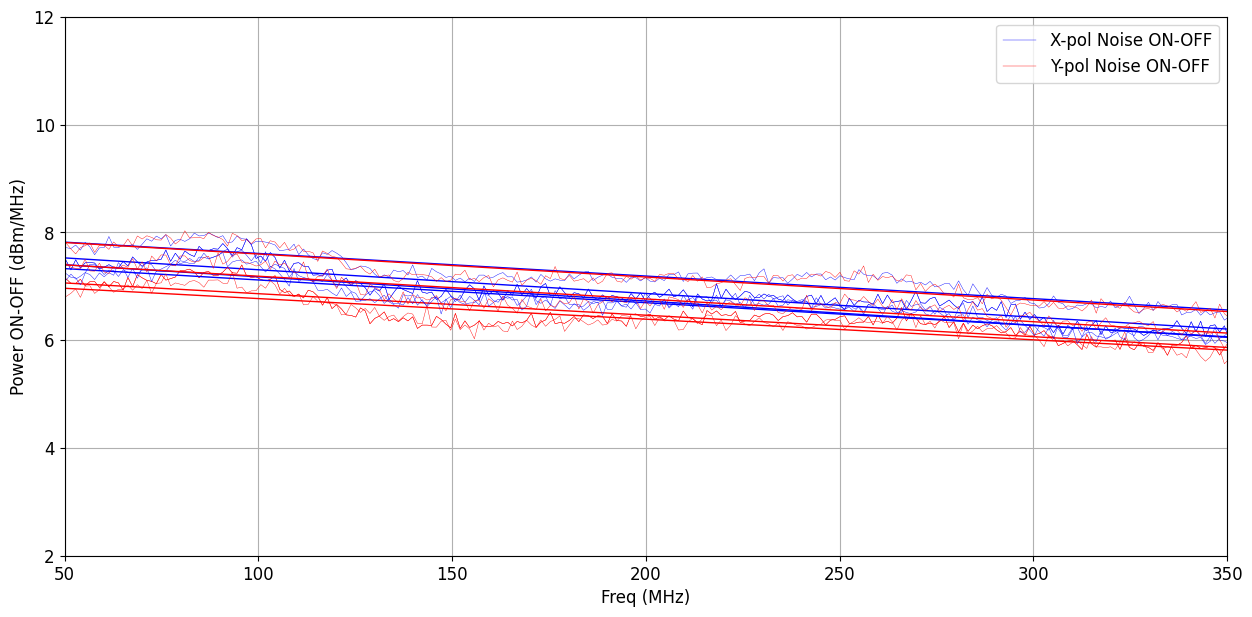

In [17]:
# SA is set to record 10 to 500 MHz
# Fits are done in the band
flow = 40.0
fhigh = 360.0
# corresdonding index range
ilow = np.argmin(np.abs(freq - flow))
ihigh = np.argmin(np.abs(freq - fhigh))

plt.figure(figsize=[15, 7])
plt.rcParams.update({"font.size": 12})
ax1 = plt.subplot(1, 1, 1)

ich = 0
for i, j in [[1, 1], [1, 2], [2, 1], [2, 2]]:
    ich += 1
    INFILE = "TC3v2_SB" + str(i) + str(j) + "x_ch" + str(ich) + "_noise_on.csv"
    freq, Pdbmon = get_frequency_spectrum(PATH + INFILE)
    INFILE = "TC3v2_SB" + str(i) + str(j) + "x_ch" + str(ich) + "_noise_off.csv"
    freq, Pdbmoff = get_frequency_spectrum(PATH + INFILE)
    norder = 1
    zz = np.polyfit(
        freq[ilow : ihigh + 1], (Pdbmon - Pdbmoff)[ilow : ihigh + 1], norder
    )
    ax1.plot(
        (freq[ilow : ihigh + 1]),
        func_poly(zz, freq[ilow : ihigh + 1]),
        "b-",
        linewidth=1,
    )
    if i == 1 and j == 1:
        ax1.plot(
            (freq),
            Pdbmon - Pdbmoff,
            "b-",
            linewidth=0.3,
            label="X-pol Noise ON-OFF",
        )
    ax1.plot((freq), Pdbmon - Pdbmoff, "b-", linewidth=0.3)

    ich += 1
    INFILE = "TC3v2_SB" + str(i) + str(j) + "y_ch" + str(ich) + "_noise_on.csv"
    freq, Pdbmon = get_frequency_spectrum(PATH + INFILE)
    INFILE = "TC3v2_SB" + str(i) + str(j) + "y_ch" + str(ich) + "_noise_off.csv"
    freq, Pdbmoff = get_frequency_spectrum(PATH + INFILE)
    freq, Pdbmoff = get_frequency_spectrum(PATH + INFILE)
    norder = 1
    zz = np.polyfit(
        freq[ilow : ihigh + 1], (Pdbmon - Pdbmoff)[ilow : ihigh + 1], norder
    )
    ax1.plot(
        (freq[ilow : ihigh + 1]),
        func_poly(zz, freq[ilow : ihigh + 1]),
        "r-",
        linewidth=1,
    )
    if i == 1 and j == 1:
        ax1.plot(
            (freq),
            Pdbmon - Pdbmoff,
            "r-",
            linewidth=0.3,
            label="Y-pol Noise ON-OFF",
        )
    ax1.plot((freq), Pdbmon - Pdbmoff, "r-", linewidth=0.3)

plt.ylabel("Power ON-OFF (dBm/MHz)")
plt.xlabel("Freq (MHz)")
plt.xlim([50.0, 350.0])
plt.ylim([2, 12])
plt.legend(loc="best")
plt.grid()
plt.show()


* Analog integration is deemed successful if 
    - the step increase on switching on the noise source raises the band by about 6 dB.
    - consistent with the expectation that the step be 7 +/- 1 dB.
    